# DataSave Parse
I decided to just save the results of all my GPU runs as pickle files, with one file for each run. This notebook is for parsing those files and plotting the results.

In [47]:
import os # For interacting with directories and files
import re # For regular expressions
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def grab_data(top_directory: str = "DataSaves"):
    # List of filenames (for example)
    filenames = os.listdir(top_directory)
    pattern = r'.*N=(\d+)_p=(\d+).*\.pkl'

    # Finding all matches
    matches = [re.search(pattern, filename) for filename in filenames]
    matches = [match for match in matches if match]

    # Extracting the filenames and the values of N and p
    result = [(match.group(0), int(match.group(1)), int(match.group(2))) for match in matches]
    # Sort results by N and p
    sorted_result = sorted(result, key=lambda x: (x[1], x[2]))

    max_N = max(item[1] for item in sorted_result)
    max_p = max(item[2] for item in sorted_result)

    N_range = range(0,max_N+1)
    p_range = range(0,max_p+1)
    # N changes with column, p changes with row
    N_mesh, p_mesh = np.meshgrid(N_range, p_range)

    return_dict = {
        "N_range" : N_range,
        "p_range" : p_range,
        "N_mesh" : N_mesh,
        "p_mesh" : p_mesh,
    }


    z_value_names = ["expectation", "overlap", "runtime", "num_QAOA_calls"]
    # For each kind of data needed, loop over the files and
    # gather the values in a matrix
    for value_name in z_value_names:
        z_matrix = np.full((max_N+1, max_p+1), np.nan)
        # Extracting data from the sorted pickle files
        for filename, N, p in sorted_result:
            file_path = os.path.join("DataSaves", filename)
            with open(file_path, 'rb') as f:
                data = pickle.load(f)

                # CHECK THAT THE INDEX ORDER IS CORRECT
                z_matrix[p, N] = data[value_name]
        return_dict[value_name] = z_matrix

    return return_dict




# Plotting the Data
Naive implementation that doesn't do anything specific for each plot.

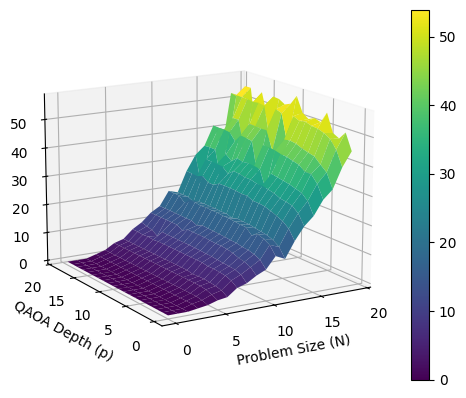

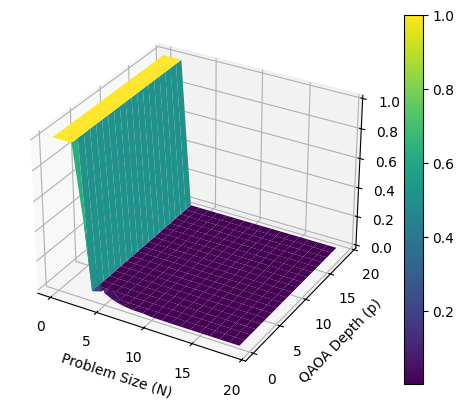

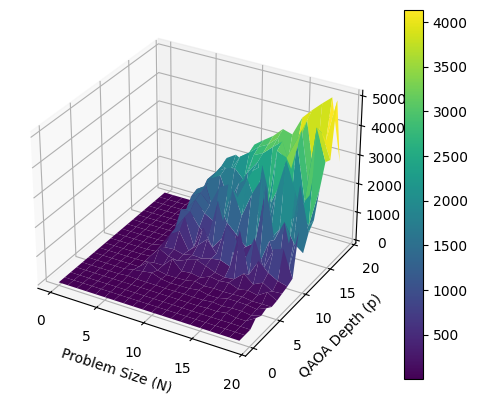

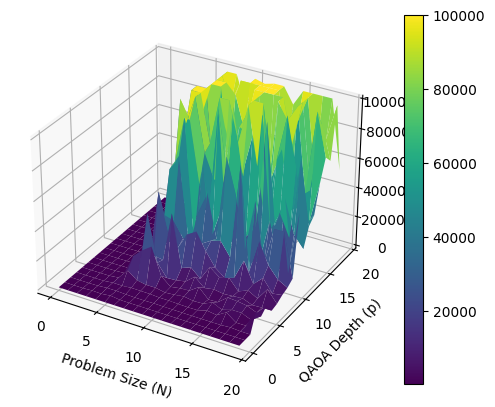

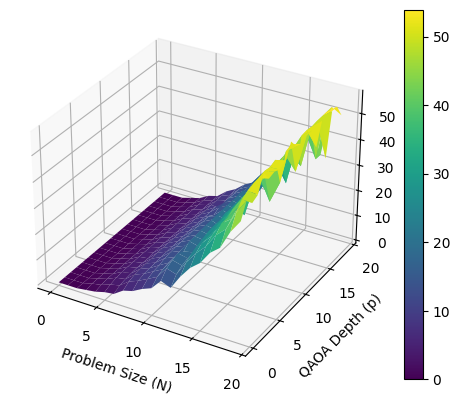

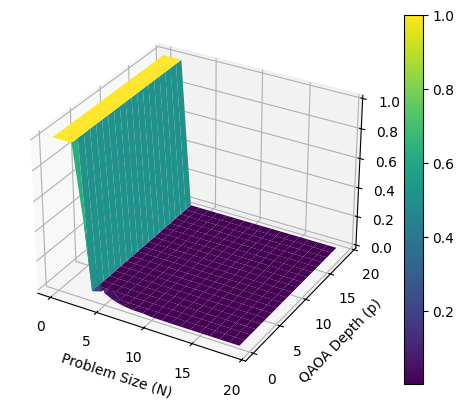

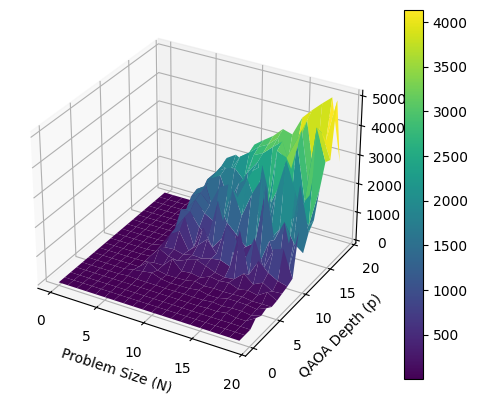

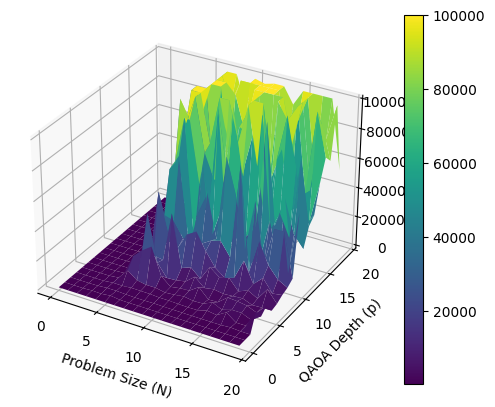

In [60]:
# For interactive plot
#%matplotlib widget 
%matplotlib inline

# Grab data from saved files
return_dict = grab_data()
N_mesh = return_dict["N_mesh"]
p_mesh = return_dict["p_mesh"]

z_value_names = ["expectation", "overlap", "runtime", "num_QAOA_calls"]
for value_name in z_value_names:
    z_matrix = return_dict[value_name]

    # Create a figure
    fig = plt.figure()
    # Add 3D subplot
    ax = fig.add_subplot(111, projection='3d')
    # Plot the surface
    surf = ax.plot_surface(N_mesh, p_mesh, z_matrix, cmap='viridis')
    # Add a color bar which maps values to colors
    fig.colorbar(surf)
    # Add labels
    ax.set_xlabel('Problem Size (N)')
    ax.set_ylabel('QAOA Depth (p)')
    ax.set_zlabel(value_name)
    # Show plot
    plt.show()



# Better Plotting
This time, I will make special graphs for each value type.



# Expectation
Given the results I have seen, a ribbon plot would be good for expectation.

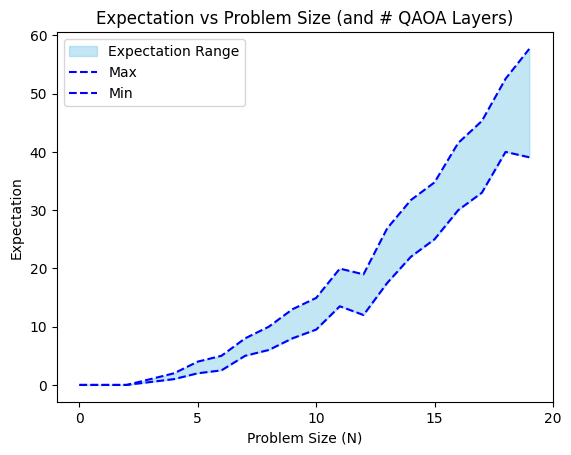

In [72]:

%matplotlib inline

# Grab data from saved files
return_dict = grab_data()
N_range = return_dict["N_range"]
p_mesh = return_dict["p_mesh"]
expectations = return_dict["expectation"]
expectation_mins = np.min(expectations, axis=0)
expectation_maxs = np.max(expectations, axis=0)

fig, ax = plt.subplots()

# Plot the ribbon
ax.fill_between(N_range, expectation_mins, expectation_maxs, color='skyblue', alpha=0.5, label='Expectation Range')
ax.plot(N_range, expectation_mins, color='blue', linestyle='--', label='Max')
ax.plot(N_range, expectation_maxs, color='blue', linestyle='--', label='Min')
plt.xlabel('Problem Size (N)')
plt.ylabel('Expectation')
ax.set_xticks(range(0, 21, 5))
plt.title('Expectation vs Problem Size (and # QAOA Layers)')
plt.legend()
plt.show()

## Overlap Plotting
For overlap, it is better to plot on log scale

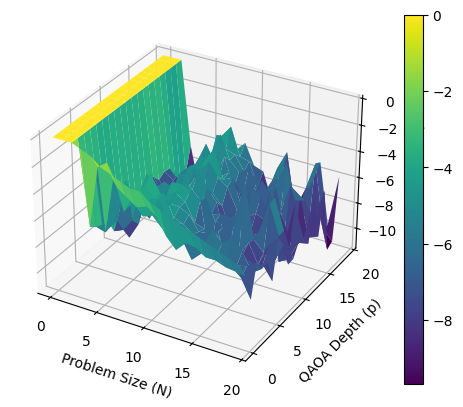

In [58]:


matrix = return_dict["overlap"]

# Create a figure
fig = plt.figure()
# Add 3D subplot
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
surf = ax.plot_surface(N_mesh, p_mesh, np.log10(matrix), cmap='viridis')
# Add a color bar which maps values to colors
fig.colorbar(surf)
# Add labels
ax.set_xlabel('Problem Size (N)')
ax.set_ylabel('QAOA Depth (p)')
ax.set_zlabel("Log10(Overlap)")
# Show plot
plt.show()



[[-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 ...
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]]
[[-4.         -4.         -4.         ... -4.         -4.
  -4.        ]
 [-3.90909091 -3.90909091 -3.90909091 ... -3.90909091 -3.90909091
  -3.90909091]
 [-3.81818182 -3.81818182 -3.81818182 ... -3.81818182 -3.81818182
  -3.81818182]
 ...
 [ 4.81818182  4.81818182  4.81818182 ...  4.81818182  4.81818182
   4.81818182]
 [ 4.90909091  4.90909091  4.90909091 ...  4.90909091  4.90909091
   4.90909091]
 [ 5.          5.          5.         ...  5.          5.
   5.        ]]


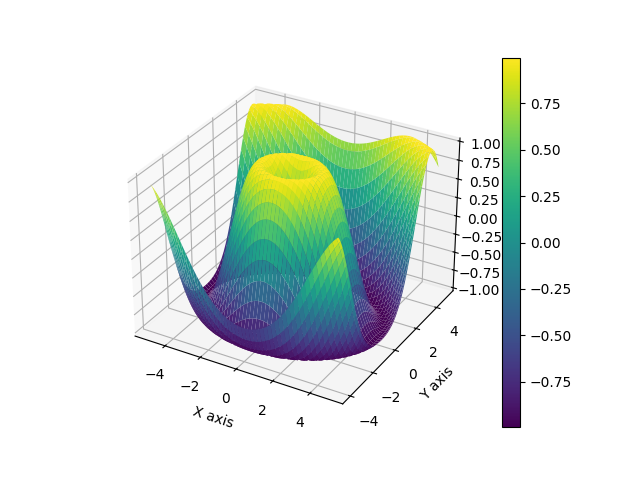

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create data
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + 2*y**2))
print(x)
print(y)

# Create a figure
fig = plt.figure()

# Add 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='viridis')

# Add a color bar which maps values to colors
fig.colorbar(surf)

# Add labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show plot
plt.show()